In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = "../data/train.csv"
data = pd.read_csv(path)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
path_test = "../data/test.csv"
data_test = pd.read_csv(path_test)
data_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
path_s = "../data/sample_submission_iA3afxn.csv"
data_s = pd.read_csv(path_s)
data_s.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [4]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
data_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


### 가변수화

### 결측치 처리

In [20]:
data.isnull().sum()
# data[col].isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##### 결측치 존재하는 컬럼 없음

### 불필요한 데이터 처리 (컬럼) : unique

In [29]:
## unique 개수 ( Total 381109 )
for col in data.columns :
    unique_no=len(np.unique(data[col]))
    print(col," ",unique_no," ( ",round(unique_no/381109*100,1)," % )")

id   381109  (  100.0  % )
Gender   2  (  0.0  % )
Age   66  (  0.0  % )
Driving_License   2  (  0.0  % )
Region_Code   53  (  0.0  % )
Previously_Insured   2  (  0.0  % )
Vehicle_Age   3  (  0.0  % )
Vehicle_Damage   2  (  0.0  % )
Annual_Premium   48838  (  12.8  % )
Policy_Sales_Channel   155  (  0.0  % )
Vintage   290  (  0.1  % )
Response   2  (  0.0  % )


##### id 의 unique 가 50% 이상이므로 해당 컬럼 삭제

### 불필요한 데이터 처리 (로우)

##### 

### outlier 처리

In [37]:
col = 'Driving_License'

In [38]:
q1 = np.percentile(data[col],25)
q3 = np.percentile(data[col],75)
iqr = q3 - q1
outlier_step = 1.5 * iqr

In [39]:
q1

1.0

In [40]:
outlier_step

0.0

In [41]:
#outlier_list_col = data[ ( data['id'] < q1 - outlier_step ) | ( data['id'] > q3 +  outlier_step ) ].index

In [42]:
#data.loc[outlier_list_col]

In [43]:
search_df = data[ ( data[col] < q1 - outlier_step ) | ( data[col] > q3 +  outlier_step ) ]

In [44]:
print(search_df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
563        564    Male   69                0         33.0                   0   
1061      1062    Male   71                0          3.0                   0   
1761      1762  Female   58                0         28.0                   0   
1990      1991    Male   66                0          8.0                   0   
2365      2366  Female   52                0         45.0                   1   
...        ...     ...  ...              ...          ...                 ...   
379869  379870    Male   65                0          8.0                   0   
380088  380089    Male   67                0         16.0                   0   
380537  380538    Male   57                0         28.0                   0   
380599  380600    Male   67                0         11.0                   1   
380917  380918    Male   68                0         31.0                   0   

       Vehicle_Age Vehicle_

In [49]:
len(data) # 'Driving_License' outlier 812

381109

In [52]:
data_noDLoutlier = data.drop(search_df.index, axis=0)

In [54]:
print(data_noDLoutlier) # 380297

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [6]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
for col in data.columns :
    print(col)

id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


In [9]:
data_no = data.select_dtypes(include=np.number)

In [10]:
data_no.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
print(' col  :  Total / outliers / rmOutliers')

In [32]:
for col in data_no.columns :
    q1 = np.percentile(data[col],25)
    q3 = np.percentile(data[col],75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    search_df = data[ ( data[col] < q1 - outlier_step ) | ( data[col] > q3 +  outlier_step ) ]
    data_no_outlier = data.drop(search_df.index, axis=0)
    print(col,'  :  ',len(data),' / ',len(search_df),' / ',len(data_no_outlier), '              (',round(len(search_df)/len(data)*100,1),'%)')

id   :   381109  /  0  /  381109               ( 0.0 %)
Age   :   381109  /  0  /  381109               ( 0.0 %)
Driving_License   :   381109  /  812  /  380297               ( 0.2 %)
Region_Code   :   381109  /  0  /  381109               ( 0.0 %)
Previously_Insured   :   381109  /  0  /  381109               ( 0.0 %)
Annual_Premium   :   381109  /  10320  /  370789               ( 2.7 %)
Policy_Sales_Channel   :   381109  /  0  /  381109               ( 0.0 %)
Vintage   :   381109  /  0  /  381109               ( 0.0 %)
Response   :   381109  /  46710  /  334399               ( 12.3 %)


In [30]:
for col in data_no.columns :
    q1 = np.percentile(data[col],25)
    q2 = np.percentile(data[col],50)
    q3 = np.percentile(data[col],75)
    print(col,'  :  q1 ',q1,' , q2 ',q2,' , q3 ',q3)

id   :  q1  95278.0  , q2  190555.0  , q3  285832.0
Age   :  q1  25.0  , q2  36.0  , q3  49.0
Driving_License   :  q1  1.0  , q2  1.0  , q3  1.0
Region_Code   :  q1  15.0  , q2  28.0  , q3  35.0
Previously_Insured   :  q1  0.0  , q2  0.0  , q3  1.0
Annual_Premium   :  q1  24405.0  , q2  31669.0  , q3  39400.0
Policy_Sales_Channel   :  q1  29.0  , q2  133.0  , q3  152.0
Vintage   :  q1  82.0  , q2  154.0  , q3  227.0
Response   :  q1  0.0  , q2  0.0  , q3  0.0


##### Driving_License 812, Annual_Premium 10320, Response 46710 개의 Outlier 제거

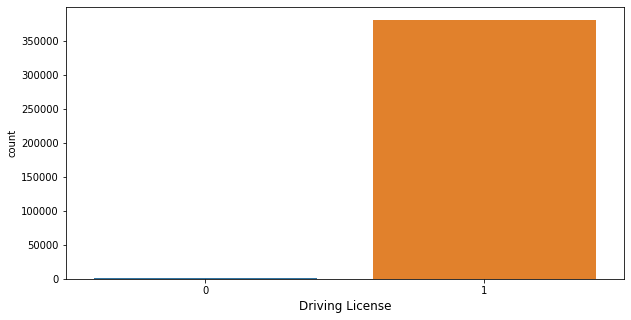

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data['Driving_License'])
plt.xlabel('Driving License', fontsize=12)
plt.show()

In [21]:
nodl_data = data[data['Driving_License']==0]
nodl_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
563,564,Male,69,0,33.0,0,1-2 Year,Yes,39730.0,26.0,53,0
1061,1062,Male,71,0,3.0,0,1-2 Year,No,25323.0,26.0,179,0
1761,1762,Female,58,0,28.0,0,1-2 Year,Yes,53047.0,122.0,214,0
1990,1991,Male,66,0,8.0,0,1-2 Year,No,48063.0,25.0,231,0
2365,2366,Female,52,0,45.0,1,1-2 Year,No,33283.0,26.0,152,0


In [27]:
nodl_resp = nodl_data[nodl_data['Response']==0]
nodl_resp.shape[0]

771

In [29]:
nodl_resp_1 = nodl_data[nodl_data['Response']==1]
nodl_resp_1.shape[0]

41

In [42]:
data[data['Response'].isnull()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [55]:
a = ['a', 'b', 'c']
b = ['ㄱ', 'ㄴ', 'ㄷ']
c = ['1', '2', '3']
d = ['aa', 'bb', '']
data_tmp = pd.DataFrame({'A':a, 'B':b, 'C':c, 'D':d})
data_tmp

,A,B,C,D
0,a,ㄱ,1,aa
1,b,ㄴ,2,bb
2,c,ㄷ,3,


In [56]:
data_tmp[data_tmp['D'].isnull()]

,A,B,C,D


In [57]:
data_tmp.count()

A    3
B    3
C    3
D    3
dtype: int64

In [58]:
data_tmp.shape

(3, 4)